In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
#(x, y), (_,_) = mnist.load_data()

In [6]:
import numpy as np
import tensorflow as tf

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

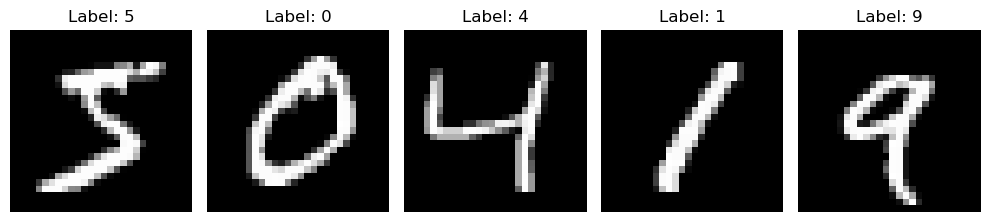

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_examples[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
type(train_examples)

numpy.ndarray

In [9]:
train_examples.shape

(60000, 28, 28)

In [10]:
test_examples.shape

(10000, 28, 28)

In [11]:
from tensorflow.keras import layers

In [48]:
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu')
])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)              

In [50]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    #optimizer='SGD',
    metrics=['accuracy'],
)

In [51]:
train_examples = train_examples.reshape(-1, 28, 28, 1)

history = model.fit(
    epochs= 6,
    x= train_examples,
    y= train_labels, 
    validation_split=0.2,
    batch_size=32
)

Epoch 1/6
1500/1500 [==============================] - 13s 8ms/step - loss: 2.8540 - accuracy: 0.4255 - val_loss: 1.5656 - val_accuracy: 0.6438
Epoch 2/6
1500/1500 [==============================] - 12s 8ms/step - loss: 1.8475 - accuracy: 0.5328 - val_loss: 1.3740 - val_accuracy: 0.5984
Epoch 3/6
1500/1500 [==============================] - 12s 8ms/step - loss: 1.7581 - accuracy: 0.5409 - val_loss: 1.7080 - val_accuracy: 0.4782
Epoch 4/6
1500/1500 [==============================] - 12s 8ms/step - loss: 1.8224 - accuracy: 0.4285 - val_loss: 4.8070 - val_accuracy: 0.2062
Epoch 5/6
1500/1500 [==============================] - 12s 8ms/step - loss: 1.7349 - accuracy: 0.5710 - val_loss: 1.0761 - val_accuracy: 0.7695
Epoch 6/6
1500/1500 [==============================] - 12s 8ms/step - loss: 1.3469 - accuracy: 0.7005 - val_loss: 1.8827 - val_accuracy: 0.7005


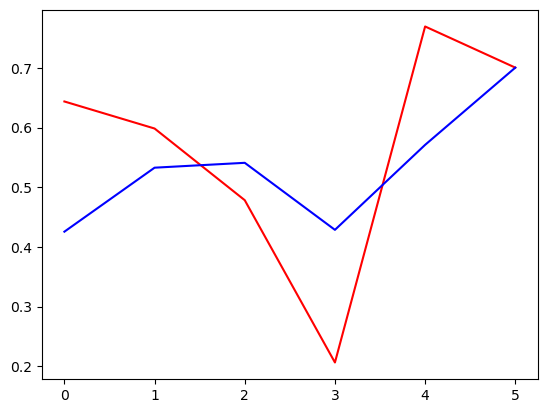

In [52]:
plt.plot(history.history['val_accuracy'], 'red')
plt.plot(history.history['accuracy'], 'blue')

In [53]:
a = test_examples

In [54]:
test_examples = tf.expand_dims(test_examples, axis=-1)

0 0


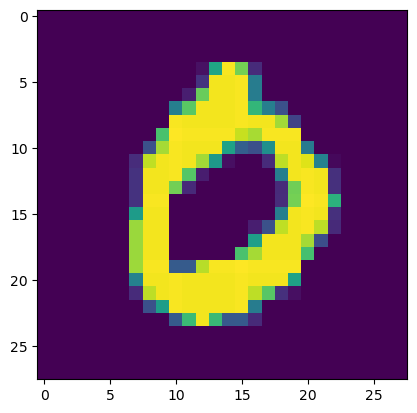

In [82]:
i = 3
plt.imshow(a[i])
print(b[i].argmax(), test_labels[i])

In [79]:
b = model.predict(test_examples)

In [80]:
l = []
for i in range(len(b)):
    l.append(b[i].argmax())

In [81]:


import numpy as np

# Mean Squared Error

def mse( y, y_pred ) :
    
    return  np.sum( ( y - y_pred ) ** 2 ) / np.size( y )

mse(test_labels, l)

4.1089

In [83]:
print(l[0:10], '\n', test_labels[0:10])

[7, 2, 1, 0, 4, 1, 3, 5, 5, 7] 
 [7 2 1 0 4 1 4 9 5 9]


In [86]:
from sklearn.metrics import accuracy_score

# Example data
y_true = [0, 1, 0, 1, 0, 1, 1, 0] 
y_pred = [1, 1, 0, 1, 0, 0, 1, 0]

# Calculate accuracy score
accuracy = accuracy_score(test_labels, l)

# Print the accuracy score
print("Accuracy Score:", accuracy)

Accuracy Score: 0.6851


In [87]:
model.save('my_model.h5')